In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Data Exploration & Preprocessing

In [3]:
train = pd.read_csv('Titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
test = pd.read_csv('Titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# droping unnecesary columns which are not useful for our analysis
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [7]:
# cabin column has lot of null values & it will not help in analysis.so drop it
train.drop('Cabin',axis=1,inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


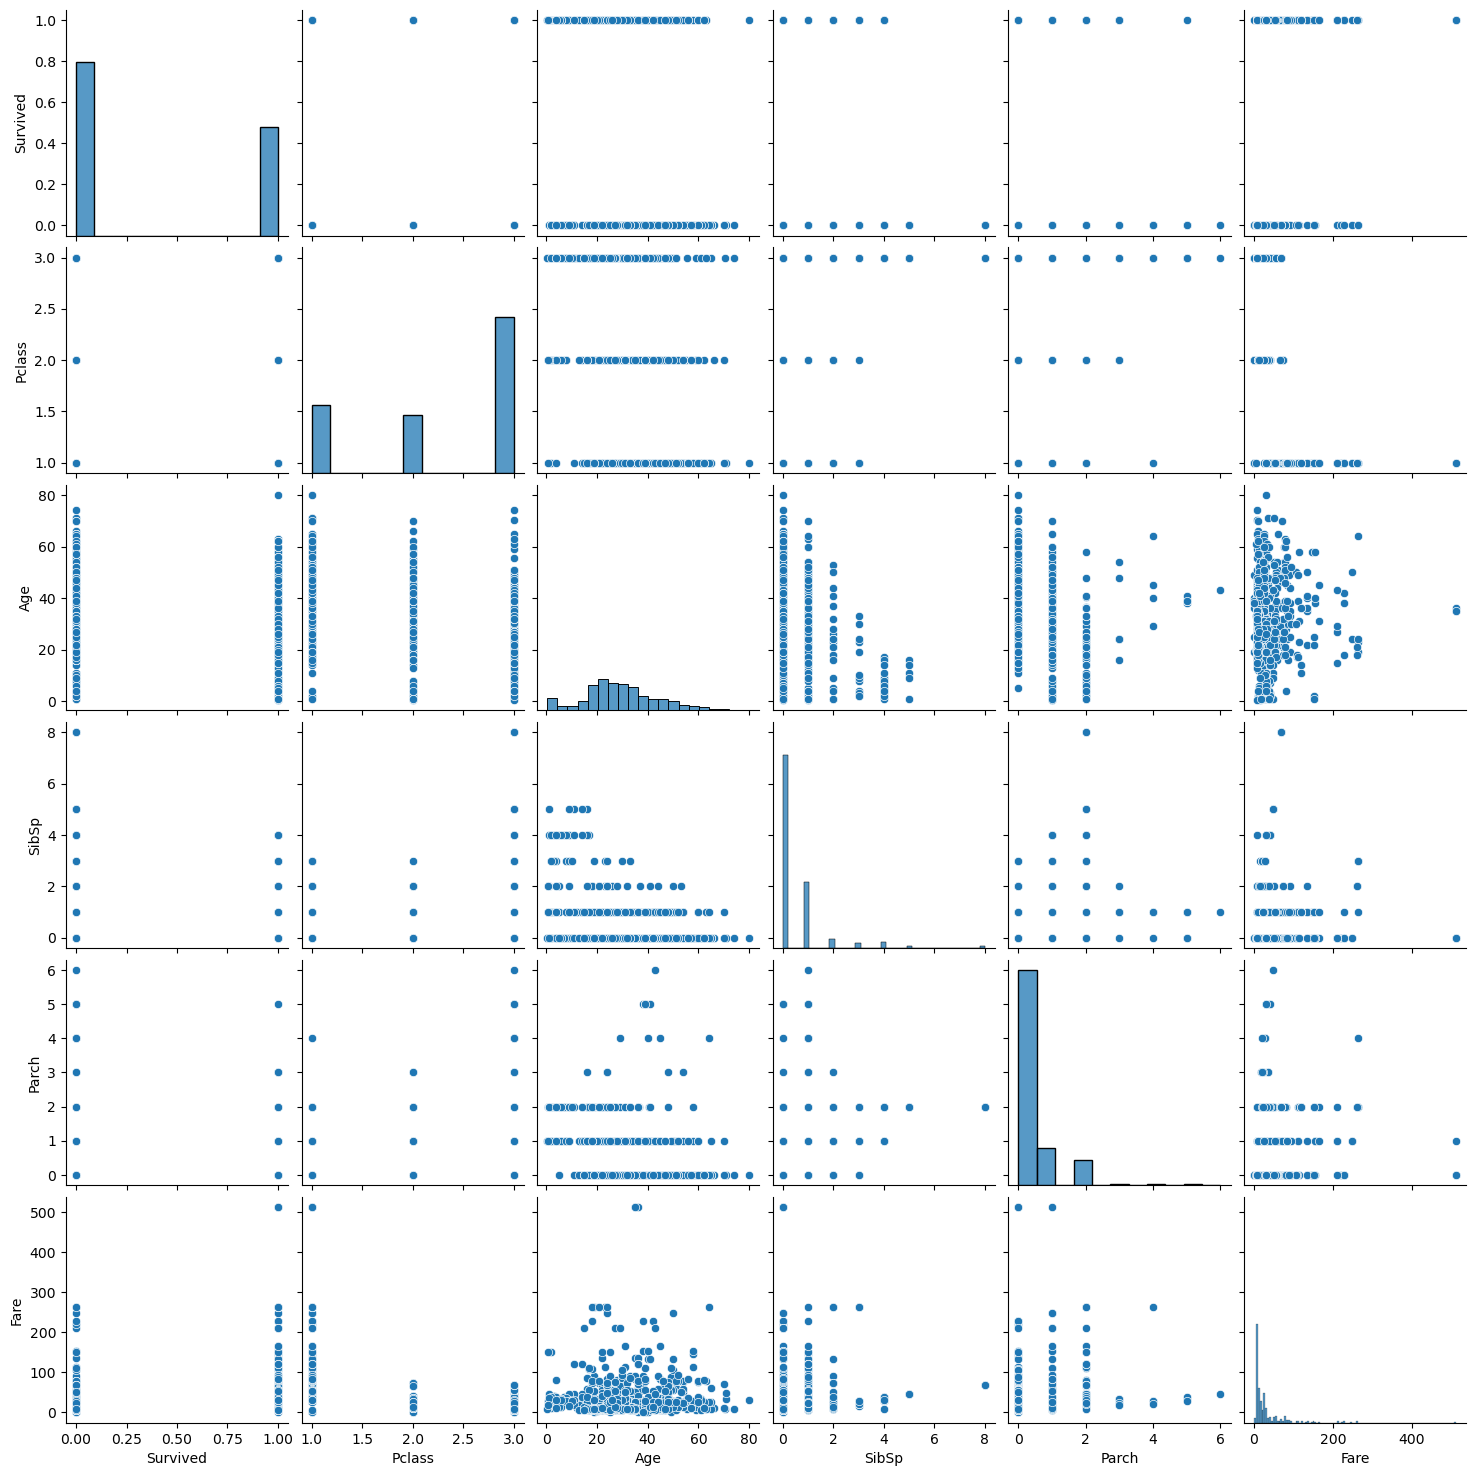

In [11]:
# lets see relation b/w variables
sns.pairplot(train)

# treating null values

<Axes: >

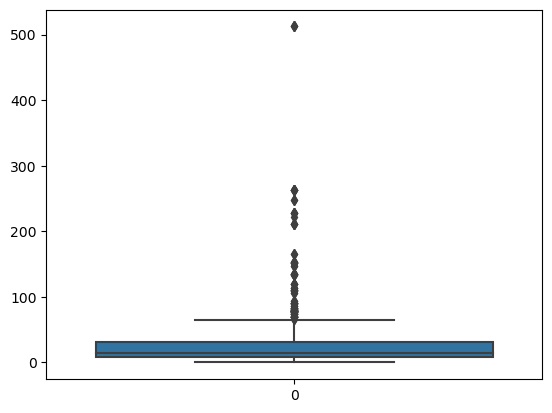

In [7]:
sns.boxplot(train.Fare)

In [8]:
train.Age.fillna(train.Age.median(),inplace=True)

In [9]:
train.Embarked.fillna(train.Embarked.mode()[0],inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
train1=pd.get_dummies(train,columns=['Sex','Embarked'],dtype=int,drop_first=True)

In [11]:
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### preparing the test data simmilarly as the train dataset

In [23]:
# droping unnecesary columns which are not useful for our analysis
test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
# cabin column has lot of null values & it will not help in analysis.so drop it
test.drop('Cabin',axis=1,inplace=True)
test.Age.fillna(train.Age.median(),inplace=True)
test.Fare.fillna(train.Fare.median(),inplace=True)
test.Embarked.fillna(train.Embarked.mode()[0],inplace=True)
test1=pd.get_dummies(test,columns=['Sex','Embarked'],dtype=int,drop_first=True)

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [25]:
test1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


# Model Building:

In [26]:
y=train1.iloc[:,0]
x=train1.iloc[:,1:]

In [27]:
model=LogisticRegression(max_iter=350)
model.fit(x,y)

LogisticRegression(max_iter=350)

In [28]:
y_p=model.predict(x)

In [29]:
print(classification_report(y,y_p))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [30]:
sm.Logit(y,x).fit().summary()

Optimization terminated successfully.
         Current function value: 0.495610
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                  0.2557
Time:                        19:59:57   Log-Likelihood:                -441.59
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.093e-61
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0323      0.086      0.377      0.706      -0.136       0.200
Age            0.0044      0.006      0.768      0.442      -0.007       0.016
SibSp         -0.2925      0.095     -3.082      0.002      -0.479      -0.106
Parch         -0.1117      0.112     -0.995      0.320      -0.332       0.108
Fare           0.0184      0.003      6.066      0.000       0.012       0.024
Sex_male      -2.2660      0.181    -12.553      0.000      -2.620      -1.912
Embarked_Q     0.2799      0.355      0.789      0.430      -0.415       0.975
Embarked_S     0.2675      0.219      1.220      0.222      -0.162       0.697
==============================================================================
"""

In [31]:
tra= train1.copy()

In [32]:
# class count
count_class_0,count_class_1 = tra.Survived.value_counts()
# divide by class
df_class_0 = tra[tra.Survived==0]
df_class_1 = tra[tra.Survived==1]

In [33]:
count_class_0,count_class_1

(549, 342)

In [34]:
df_class_0.shape

(549, 9)

In [35]:
df_class_1.shape

(342, 9)

In [36]:
df_class_0_under =df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under,df_class_1],axis=0)

In [37]:
x=df_under.iloc[:,1:]
y= df_under.iloc[:,0]

In [38]:
model=LogisticRegression(max_iter=300)
model.fit(x,y)

LogisticRegression(max_iter=300)

# Model Evaluation:

In [39]:
y_p=model.predict(x)

In [40]:
print(classification_report(y,y_p))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       342
           1       0.81      0.77      0.79       342

    accuracy                           0.79       684
   macro avg       0.79      0.79      0.79       684
weighted avg       0.79      0.79      0.79       684



In [41]:
sm.Logit(y,x).fit().summary()

Optimization terminated successfully.
         Current function value: 0.526845
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  684
Model:                          Logit   Df Residuals:                      676
Method:                           MLE   Df Model:                            7
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                  0.2399
Time:                        20:00:33   Log-Likelihood:                -360.36
converged:                       True   LL-Null:                       -474.11
Covariance Type:            nonrobust   LLR p-value:                 1.685e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.1995      0.094      2.131      0.033       0.016       0.383
Age            0.0016      0.007      0.253      0.801      -0.011       0.014
SibSp         -0.3375      0.103     -3.288      0.001      -0.539      -0.136
Parch         -0.1114      0.128     -0.873      0.383      -0.362       0.139
Fare           0.0234      0.004      5.810      0.000       0.016       0.031
Sex_male      -2.2049      0.199    -11.075      0.000      -2.595      -1.815
Embarked_Q     0.1752      0.383      0.458      0.647      -0.575       0.925
Embarked_S     0.3010      0.238      1.267      0.205      -0.165       0.767
==============================================================================
"""

# Interpretation
* log(odds) = b0 + b1 X1 + b2 X2 + b3 X3 + b4 X4 b5 X5 + b6 X6 +b7 X7 +b8 X8

* let's interpret for cityEmbarked_S(X8) & SEX MALE(X6)
* see X6 having negative coefficient i.e if male(1) probability of survival(odds) decreases by -2.099.if Female(0) probability of survival(odds) increases by 2.099
* similarly Embarked_S has positive coefficient i.e if person embarked at S there is possibility of survival increases by 0.2170 

# Roc curve

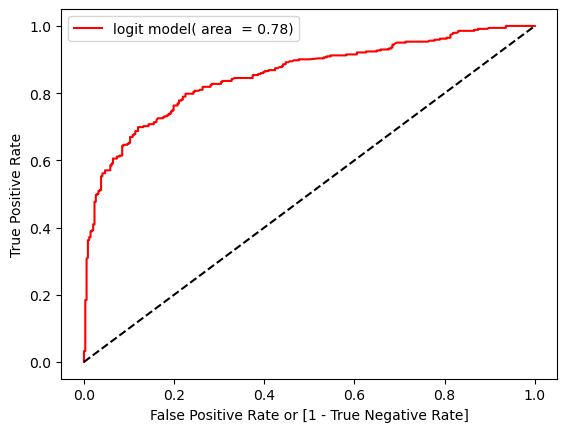

In [30]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba (x)[:,1])

auc = round(roc_auc_score(y, y_p),2)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label=f'logit model( area  = {auc})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# predictions on Titanic_test.csv

In [43]:
Test_predictions= model.predict(test1)

# Interview Questions

#### 1. Precision vs. Recall
* Precision and recall are two key metrics used in binary classification to evaluate the performance of a model. They measure different aspects of a model's ability to correctly predict positive and negative instances.

* Precision: This metric measures the proportion of positive predictions that were actually correct. In other words, it tells you how accurate the model was when it predicted a positive instance.

* Formula: Precision = True Positives / (True Positives + False Positives)
* Recall: This metric measures the proportion of actual positive instances that were correctly predicted. It tells you how well the model was able to identify all of the positive instances.

* Formula: Recall = True Positives / (True Positives + False Negatives)
* Trade-off: There is often a trade-off between precision and recall. Increasing precision may lead to a decrease in recall, and vice versa. The optimal balance depends on the specific requirements of the problem.   

#### 2. Cross-Validation
* Cross-validation is a technique used to evaluate the performance of a machine learning model by dividing the dataset into multiple folds and training the model on different subsets of the data. This helps to prevent overfitting and provides a more reliable estimate of the model's performance.   

* Why is it important in binary classification?

* Overfitting Prevention: By training and evaluating the model on different subsets of the data, cross-validation helps to identify and mitigate overfitting, which occurs when a model learns the training data too well and performs poorly on new, unseen data.
* Performance Estimation: Cross-validation provides a more accurate estimate of the model's performance on unseen data compared to a single train-test split. This is because the model is evaluated on multiple subsets of the data, reducing the variability of the results.   
* Hyperparameter Tuning: Cross-validation can be used to tune hyperparameters, which are parameters that are not learned from the data but are set before training. By evaluating the model's performance on different hyperparameter settings, you can find the optimal configuration for your specific problem.
* Common cross-validation techniques include:

* K-fold cross-validation: The dataset is divided into k folds, and the model is trained k times, each time using k-1 folds for training and 1 fold for testing.
* Stratified k-fold cross-validation: This variation ensures that each fold contains approximately the same proportion of positive and negative instances as the original dataset.
* Leave-one-out cross-validation (LOOCV): This technique is computationally expensive, especially for large datasets, as it trains the model n times, where n is the number of data points.

### Logistic Regression = https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html
* Hyperparameters in Logistic Regression

Hyperparameters are settings that control the learning process of a machine learning model. In logistic regression, tuning these hyperparameters can significantly impact the model's performance. Here are the key hyperparameters:

1. Solver:

Purpose: Determines the optimization algorithm used to find the optimal coefficients.
Options:
lbfgs: Quasi-Newton method, suitable for small to medium-sized datasets.
liblinear: Coordinate descent, efficient for large datasets with sparse features.
newton-cg: Newton-Conjugate Gradient, suitable for medium-sized datasets.
newton-cholesky: Newton-Cholesky method, suitable for small datasets.
sag: Stochastic Average Gradient descent, efficient for large datasets.
saga: Stochastic Average Gradient descent with mini-batch and L1 regularization, suitable for large datasets with many features.
Choosing the right solver:

Dataset size: For large datasets, consider sag or saga.
Feature sparsity: For sparse datasets, liblinear is often a good choice.
Regularization: If you need L1 regularization, saga is a suitable option.
Convergence speed: For faster convergence, consider newton-cg or newton-cholesky for smaller datasets.
2. Penalty:

Purpose: Introduces regularization to prevent overfitting.
Options:
l1: L1 regularization (Lasso regularization)
l2: L2 regularization (Ridge regularization)
elasticnet: Combination of L1 and L2 regularization
Choosing the right penalty:
L1: Suitable for feature selection when many features are irrelevant.
L2: Suitable for reducing the impact of collinearity among features.
ElasticNet: A good balance between L1 and L2, useful when both feature selection and regularization are needed.
3. C (Inverse of Regularization Strength):

Purpose: Controls the strength of regularization.
Higher C: Less regularization, more prone to overfitting.
Lower C: More regularization, less prone to overfitting.
Choosing the right C:
Experiment with different values to find the optimal balance between bias and variance.
Use techniques like cross-validation to assess performance.
4. Max_iter:

Purpose: Maximum number of iterations for the solver.
Higher max_iter: More iterations, potentially better convergence but longer training time.
Choosing the right max_iter:
Experiment with different values and monitor the convergence of the model.
General Guidelines:

For smaller datasets with fewer features, you might not need much regularization, so a higher C value and less aggressive regularization (e.g., L2) can be suitable.
For larger datasets with many features, stronger regularization (e.g., L1 or ElasticNet) and a lower C value can help prevent overfitting.
Experimentation and cross-validation are crucial to find the optimal hyperparameter settings for a specific dataset and problem.
By carefully tuning these hyperparameters, you can significantly improve the performance of your logistic regression model.